In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
df = pd.read_excel('autoMPG_data.xlsx')

In [34]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


## Dropping unnecessary columns
---



In [35]:
df2 = df.drop(columns=['Year', 'Year70To81', 'Origin', 'Origin.Eq.1', 'Origin.Eq.2', 'Origin.Eq.3', 'Name'])


In [36]:
df2.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5


<Axes: >

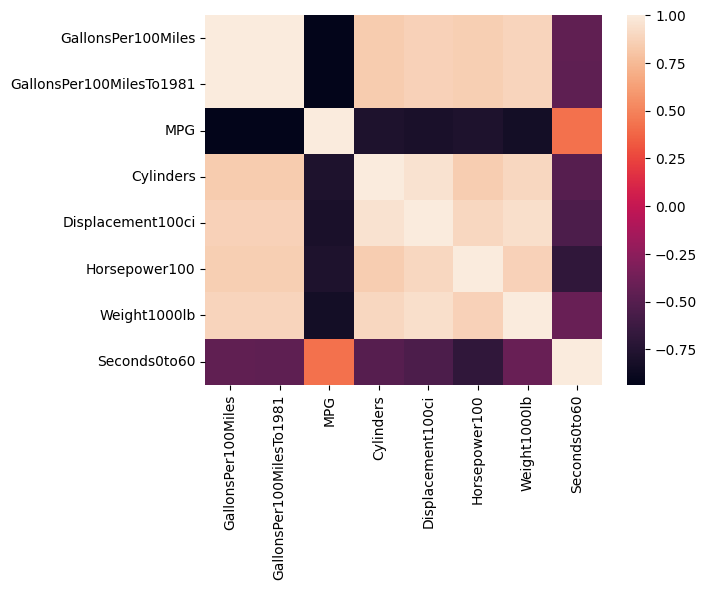

In [37]:
sns.heatmap(df2.corr())

### Checking data for missing values and starting to take a look on the horsepower variable
---

In [38]:
print("Missing values:\n", df2.isnull().sum())

Missing values:
 GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
dtype: int64


In [39]:
df2.Horsepower100.describe()

count    392.000000
mean       1.044694
std        0.384912
min        0.460000
25%        0.750000
50%        0.935000
75%        1.260000
max        2.300000
Name: Horsepower100, dtype: float64

In [40]:
df2.Horsepower100.info()

<class 'pandas.core.series.Series'>
RangeIndex: 392 entries, 0 to 391
Series name: Horsepower100
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<Axes: >

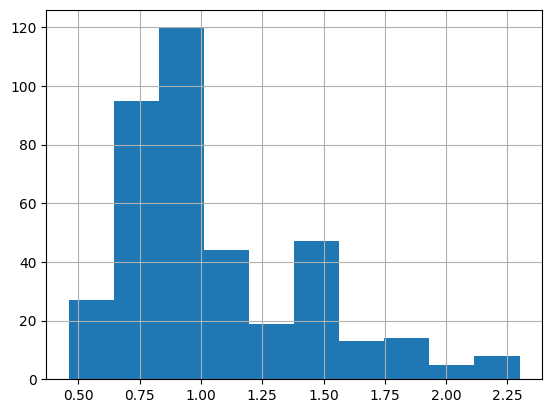

In [41]:
df2.Horsepower100.hist()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


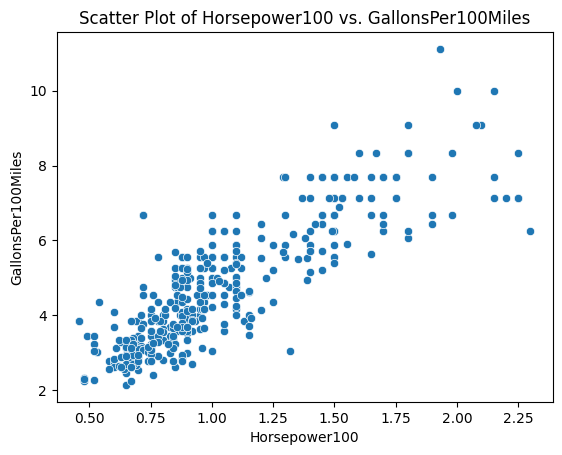

In [42]:
sns.scatterplot(x='Horsepower100', y='GallonsPer100Miles', data=df2)
plt.title("Scatter Plot of Horsepower100 vs. GallonsPer100Miles")
plt.show()

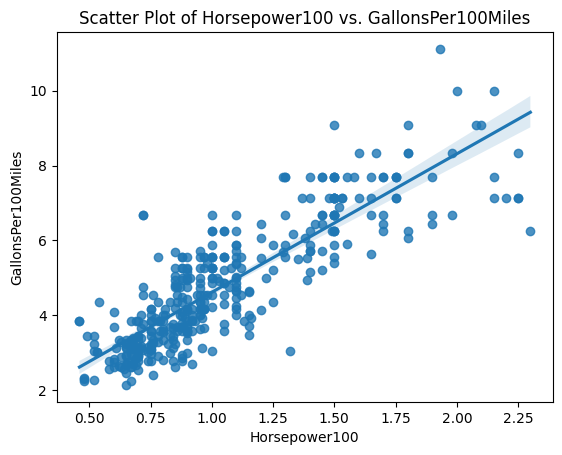

In [43]:
sns.regplot(x='Horsepower100', y='GallonsPer100Miles', data=df2)
plt.title("Scatter Plot of Horsepower100 vs. GallonsPer100Miles")
plt.show()

In [44]:
correlation = df2['Horsepower100'].corr(df2['GallonsPer100Miles'])
print("Correlation coefficient with GallonsPer100Miles:", correlation)

Correlation coefficient with GallonsPer100Miles: 0.8548085403430743


### After drawing histogram and few scatterplots, we are aslo checking the correlation (Horsepower & gallonsper100miles and we can see that there is strong correlation between those variables)
---

### Next we're taking a look on the cylinders variable


<Axes: >

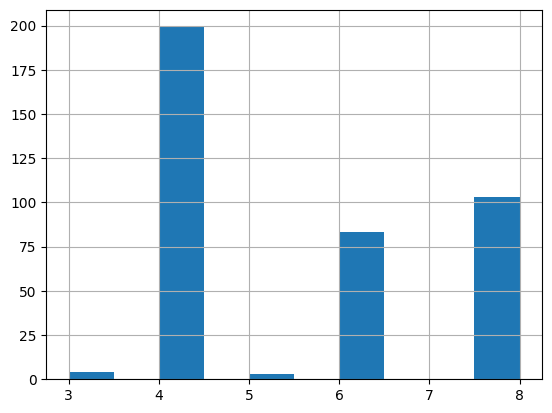

In [45]:
df2.Cylinders.hist()

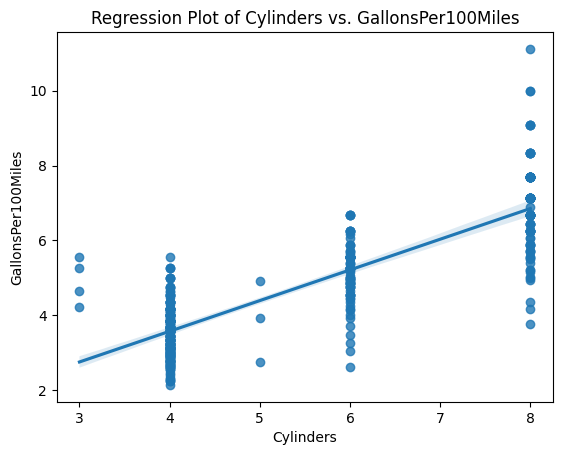

In [46]:
sns.regplot(x='Cylinders', y='GallonsPer100Miles', data=df2)
plt.title("Regression Plot of Cylinders vs. GallonsPer100Miles")
plt.show()

In [47]:
correlation = df2['Cylinders'].corr(df2['GallonsPer100Miles'])
print("Correlation coefficient with GallonsPer100Miles:", correlation)

Correlation coefficient with GallonsPer100Miles: 0.8393845490666227


## We can see that cylinders also has strong correlation with gallonsper100miles
---

## Last variable we're having a look at is weight 1000lb


<Axes: >

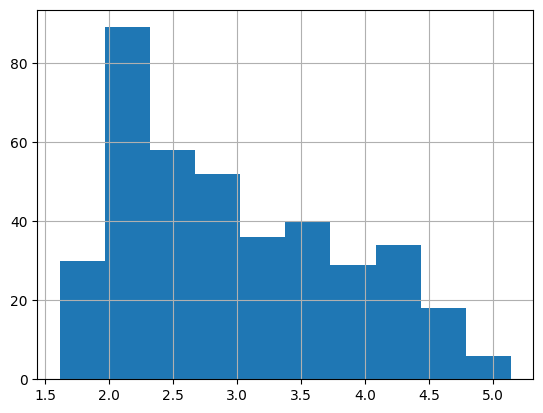

In [48]:
df2.Weight1000lb.hist()

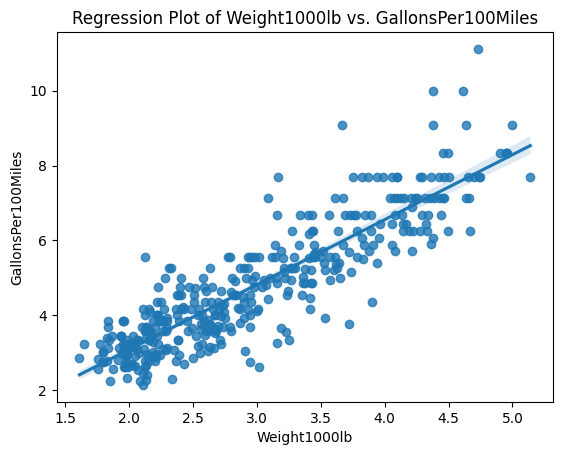

In [49]:
sns.regplot(x='Weight1000lb', y='GallonsPer100Miles', data=df2)
plt.title("Regression Plot of Weight1000lb vs. GallonsPer100Miles")
plt.show()

In [50]:
correlation = df2['Weight1000lb'].corr(df2['GallonsPer100Miles'])
print("Correlation coefficient with GallonsPer100Miles:", correlation)

Correlation coefficient with GallonsPer100Miles: 0.8850559772615422




---

## Making few different models to see which one gives the best values


In [51]:
X = df['Weight1000lb'].to_frame()

In [52]:
y = df['GallonsPer100Miles']

In [53]:
from sklearn.linear_model import LinearRegression

fuel_model = LinearRegression().fit(X,y)

In [54]:
y = df2['GallonsPer100Miles']
X1 = df2[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df2[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df2[['Cylinders', 'Displacement100ci', 'Seconds0to60']]
X4 = df2[['Horsepower100', 'Cylinders', 'Weight1000lb']] 

In [55]:
fuel_model1 = LinearRegression().fit(X1,y)
fuel_model2 = LinearRegression().fit(X2,y)
fuel_model3 = LinearRegression().fit(X3,y)
fuel_model4 = LinearRegression().fit(X4,y)

In [56]:
print("Model 1:",fuel_model1.score(X1,y))
print("Model 2:",fuel_model2.score(X2,y))
print("Model 3:",fuel_model3.score(X3,y))
print("Model 4:",fuel_model4.score(X4,y))

Model 1: 0.8207948199718269
Model 2: 0.8158213878482583
Model 3: 0.7529103569205208
Model 4: 0.8176921365228299


In [57]:
fuel_model4.predict([[2, 4, 3.5], [1.5, 4, 2.4], [0.88, 4, 2.375], [2.25, 6, 3.504]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.4532611 , 4.68209773, 3.79193656, 7.04072628])

---

### Interpolation, Extrapolation and Errors 

In [58]:
interpolation_fuelmodel4 = ([ [1.98, 7, 3.433 ], [2.2, 7, 4.615] ])
interpolation_prediction = fuel_model4.predict(interpolation_fuelmodel4)
print ("Interpolation prediction:" , interpolation_prediction) 

Interpolation prediction: [6.71167057 8.1718225 ]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
extrapolation_fuelmodel4 = ([ [0.4, 2, 1.55], [2.6, 9, 5.5 ] ])
extrapolation_prediction = fuel_model4.predict(extrapolation_fuelmodel4)
print("Extrapolation prediction ", extrapolation_prediction)

Extrapolation prediction  [2.08248033 9.82809065]


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


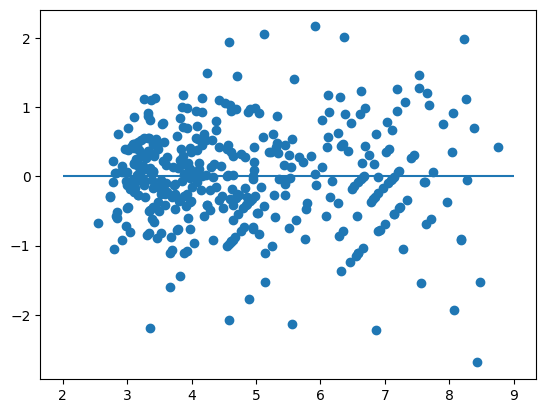

In [60]:
plt.scatter(fuel_model1.predict(X1), fuel_model1.predict(X1)-y)

plt.hlines(y=0,xmin=2,xmax=9)

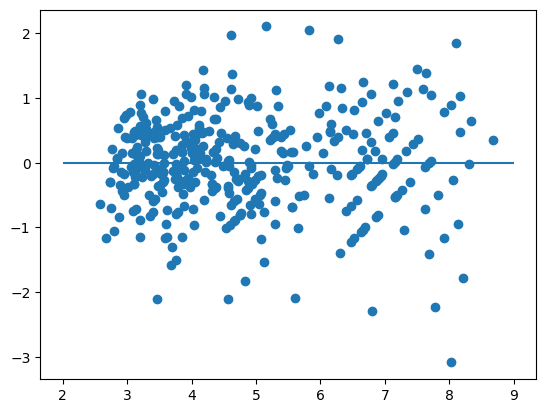

In [61]:
plt.scatter(fuel_model4.predict(X4), fuel_model4.predict(X4)-y)

plt.hlines(y=0,xmin=2,xmax=9)